# Extend AI take-home project

The idea of this project is to exploit the existing data to create more images. We expect that the lack of training data will result in a very low precision of the model. We try to compensate this by augmenting the initial images. Once we have new images, we use CVAT to manually segment the images. The segmented images are loaded in the `labeled_images` forlder. As a last step, we apply a YOLOv5 to the image dataset, splitting it into training, validation and test set. Before doing this, we need to convert the annotations file from PASCAL to YOLO format. 

## Part 1: Data Augmentation

In this first notebook we perform data augmentation, as a first attempt to get more data to train our model on. This augmentation is performed exploting the `skimage` tools. 

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import io
from skimage.transform import rotate, resize
from skimage.util import random_noise
from skimage.filters import gaussian


from tqdm import tqdm
import random

In [27]:
IMG_DIR = 'data/'
OUT_DIR = 'augmented_data/'
WIDTH = 600
HEIGHT = 600
VAR = 0.2
angles = [-60, -45, -30, 30, 45, 60]

img_list = os.listdir(IMG_DIR)
base_imgs = []

for image_name in tqdm(img_list):
    (name, ext) = image_name.split('.')
    if (ext == 'jpg'):
        image = io.imread(IMG_DIR + name + '.' + ext)
        # resize the image to decrease memory and computational cost: this will possibly the precision too
        image = resize(image, (WIDTH, HEIGHT), anti_aliasing=True)
        
        rand_angle = random.choice(angles)
        
        # transformation on the resized image
        io.imsave(OUT_DIR + name + '_0.' + ext, image)
        io.imsave(OUT_DIR + name + '_1.' + ext, rotate(image, angle=rand_angle, mode = 'wrap'))
        io.imsave(OUT_DIR + name + '_2.' + ext, np.fliplr(image))
        io.imsave(OUT_DIR + name + '_3.' + ext, np.flipud(image))
        io.imsave(OUT_DIR + name + '_4.' + ext, random_noise(image, var=VAR**2))


  0%|                                                     | 0/7 [00:00<?, ?it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 14%|██████▍                                      | 1/7 [00:01<00:06,  1.11s/it]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy c

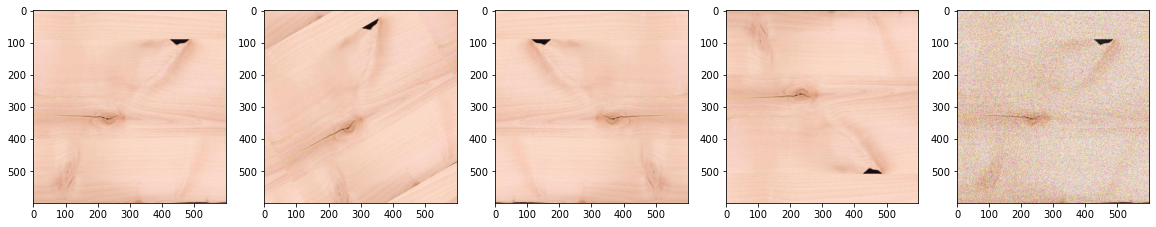

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
test_img = img_list[3]
(name, ext) = test_img.split('.')
for i in range(5):
    ax[i].imshow(io.imread(OUT_DIR + name + '_' + str(i) + '.' + ext))